# Linear Transformations 

A linear transformation is a mapping between vector spaces that 
preserves addition and scalar multiplication. A map $L: V \to W$
is a linear transformation from $V$ to $W$ if 

$$L(a x_1  + b x_2) = a L(x_1) + bL(x_2)$$

For all $x_1, x_2 \in V$ and scalars $a, b \in \mathbb{F}$.

In [5]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')
%matplotlib inline

In [2]:
# load the dataset
data = np.load('data/horse.npy')

In [3]:
data.shape

(2, 59520)

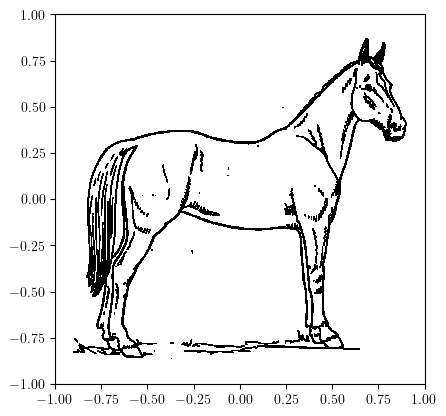

In [26]:
# use markers , = pixel
# reference https://matplotlib.org/stable/api/markers_api.html
plt.plot(data[0], data[1], 'k,')
# make plot square 
plt.axis([-1, 1, -1, 1])
plt.gca().set_aspect("equal")

## Types of Linear Transformations

- Stretch 

$$
\begin{bmatrix}
a & 0  \\ 
0 & b 
\end{bmatrix}
$$

if $a = b$, then it is called _dilation_. $a$ works on x-axis and $b$ works on y-axis. 

- Shear

$$
\begin{bmatrix}
1 & a  \\ 
b & 1 
\end{bmatrix}
$$

Pure horizontal shears ($b=0$) skew the x-coordinate of
the vector while pure vertical shears ($a=0$) skew the
y-coordinate. 

- Reflection: reflect the vector about a line that passes
through the origin. The reflection about the line spanned
by the vector $[a, b]^T$ has the matrix representation 

$$
\frac{1}{a^2 + b^2} 
\begin{bmatrix}
a^2-b^2 & 2ab  \\ 
2ab & b^2-a^2 
\end{bmatrix}
$$


- Rotation:

$$
\begin{bmatrix}
\cos \theta & - \sin \theta  \\ 
\sin \theta & \cos \theta
\end{bmatrix}
$$

A negative value of $\theta$ performs a clockwise rotation. Choosing $\theta = \pi/4$ produces the the following figure. 

In [41]:
def linear_transformation(mat_a: np.ndarray, transform=None):
    """
    Operating linear transformation on mat_a
    ------------
    Parameters of transformation was fixed to demonstrate 
    """
    if transform is None:
        return mat_a 

    # initialize transform matrix 
    transform_mat = np.zeros((2, 2))

    transform_mat_stretch = np.array(
            [
                [1/2, 0],
                [0, 6/5]
            ]
        )
    
    transform_mat_shear = np.array(
            [
                [1, 1/2],
                [0,1]
            ]
        )
    
    a, b = 0, 1
    transform_mat_reflection = np.array(
        [
            [a**2-b**2, 2*a*b],
            [2*a*b,b**2-a**2]
        ]
    )/(a**2 + b**2)

    theta = np.pi/2
    transform_mat_rotation = np.array(
        [
            [np.cos(theta), -np.sin(theta)],
            [np.sin(theta),np.cos(theta)]
        ]
    )
    if transform == 'stretch':
        mat_a = transform_mat_stretch @ mat_a 
    elif transform == 'shear':
        mat_a = transform_mat_shear @ mat_a 
    elif transform == 'reflection':
        mat_a = transform_mat_reflection @ mat_a 
    elif transform == 'rotation':
        mat_a = transform_mat_rotation @ mat_a 
    else:
        # do all transformation 
        mat_a = transform_mat_stretch @ mat_a
        mat_a = transform_mat_shear @ mat_a 
        mat_a = transform_mat_reflection @ mat_a
        mat_a = transform_mat_rotation @ mat_a 

    return mat_a

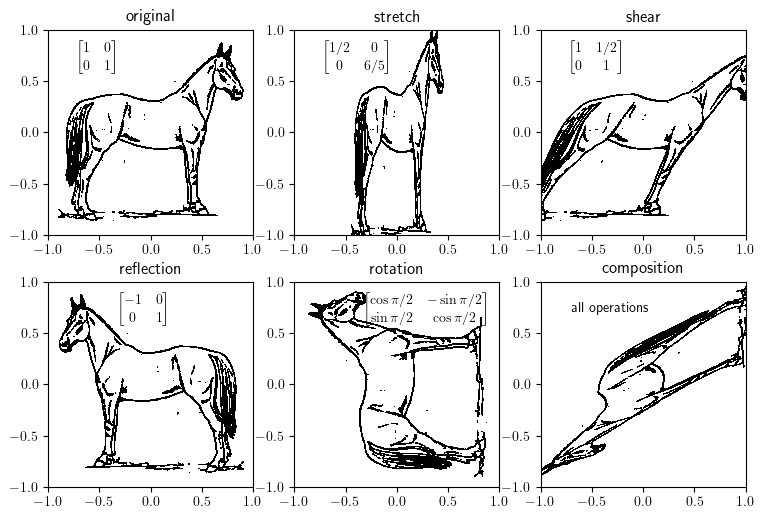

In [48]:
# plot all transformation
trans_title = [None, 'stretch', 'shear', 'reflection', 'rotation', 'composition']
trans_text = [
    r'$\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$',
    r'$\begin{bmatrix} 1/2 & 0 \\ 0 & 6/5 \end{bmatrix}$',
    r'$\begin{bmatrix} 1 & 1/2 \\ 0 & 1 \end{bmatrix}$',
    r'$\begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix}$',
    r'$\begin{bmatrix} \cos \pi/2 & -\sin \pi/2 \\ \sin \pi/2 &  \cos \pi/2 \end{bmatrix}$'
]
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
axs = axes.ravel()

for i, t in enumerate(trans_title):
    # transform
    tmp = linear_transformation(data, t)
    axs[i].plot(tmp[0], tmp[1], 'k,')
    axs[i].axis([-1, 1, -1, 1])
    axs[i].set_aspect("equal")
    if t is None:
        axs[i].set_title('original')
    else:
        axs[i].set_title(t)
    if i < 3:
        axs[i].text(-0.7, 0.7, trans_text[i])
    if i >= 3 and i <5:
        axs[i].text(-0.3, 0.7, trans_text[i])
    if i == 5 :
        axs[i].text(-0.7, 0.7, 'all operations')

## Modeling Motion with Affine Transformations

![moon-motion](images/moon-motion.png)

 The moon orbits the earth while the earth orbits the sun. Assuming circular
orbits, we can compute the trajectories of both the earth and the moon using 
only linear and affine transformations.

Suppose the planet has _angular_ velocity $\omega$. If $R(\theta)$
is the matrix representation of the linear transformation that
rotates a vector around the origin by $\theta$ radians, then $p(t) = R(t\omega)p(0)$.

In [8]:
# simulate earth and moon motion 
def earth_and_moon(xe: float, xm: float, 
                            omega_e: float, omega_m: float, 
                            T: float):
    """
    A function that simulates the motion of earth and moon 
    """
    # the initial position
    pe0 = np.array(
        [xe, 0]
    )
    pm0 = np.array(
        [xm, 0]
    )

    e_positions = []
    m_positions = []

    def _rotation_matrix(omega, T):
        rotation_e = np.array(
            [
                [np.cos(omega* T), -np.sin(omega * T)],
                [np.sin(omega * T),np.cos(omega * T)]
            ]
        )

        return rotation_e

    steps_num = int(T/0.01)
    discrete_time = np.linspace(0, T, steps_num)

    for t in discrete_time:
        # calcualte rotation for earth and moon
        r_e = _rotation_matrix(omega_e, t)
        r_m = _rotation_matrix(omega_m, t)
        # calcualte the current position
        p_e = r_e @ pe0 
        p_m = r_m @ (pm0  - pe0)  # the postion of moon relative to the eart
        p_m = p_m + p_e  # p_e as base 
        

        e_positions.append(p_e)
        m_positions.append(p_m)

    
    return np.array(e_positions), np.array(m_positions)

In [11]:
T = np.pi * 3 / 2
xe = 10
xm = 11
we = 1
wm = 13
foo_ep, foo_mp = earth_and_moon(xe, xm, we, wm, T)

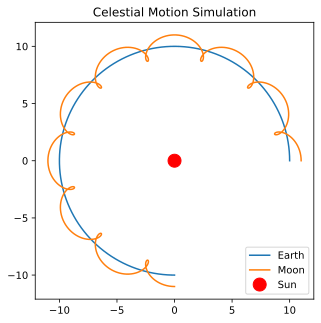

In [12]:
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(foo_ep[:, 0], foo_ep[:, 1], label='Earth')
ax.plot(foo_mp[:, 0], foo_mp[:, 1], label='Moon')
ax.plot(0, 0, 'ro', markersize=13, label='Sun')
ax.set_title("Celestial Motion Simulation")
ax.legend(); 

## Timing Matrix Operations

Linear transformations are easy to perform via matrix multiplication. However, performing matrix
multiplication with very large matrices can strain a machine’s time and memory constraints. For
the remainder of this lab we take an empirical approach in exploring how much time and memory
different matrix operations require.

In [2]:
def for_loop():
    """Time for_loop with time.time()"""
    for _ in range(int(1e7)):
        pass


%timeit for_loop()

117 ms ± 9.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
from random import random
def random_vector(n):
    """Generate a random vector of length n as a list."""
    return [random() for i in range(n)]

def random_matrix(n):
    """Generate a random nxn matrix as a list of lists."""
    return [[random() for j in range(n)] for i in range(n)]

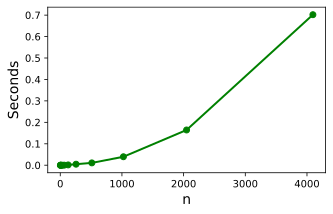

In [8]:
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
domain = 2**np.arange(1,13)
times = []
for n in domain:
    start = time.time()
    random_matrix(n)
    times.append(time.time()-start)

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(domain, times, 'g.-', lw=2, ms=12)
ax.set_xlabel("n", fontsize=14)
ax.set_ylabel("Seconds", fontsize=14);

An algorithm like random_matrix(n) whose execution time increases quadratically with $n$ is called $O\left(n^2\right)$, notated by random_matrix $(\mathrm{n}) \in O\left(n^2\right)$. Big-oh notation is common for indicating both the temporal complexity of an algorithm (how the execution time grows with $n$ ) and the spatial complexity (how the memory usage grows with $n$ ).

In [9]:
def matrix_vector_prod(A, x):
    m, n = len(A), len(x)
    return [sum([A[i][k] * x[k] for k in range(n)]) for i in range(m)]

def matrix_matrix_prod(A, B):
    m, n, p = len(A), len(B), len(B[0])
    prod = [
        [
            sum(
                [A[i][k] * B[k][j] for k in range(n)]
                ) 
                for j in range(p)] 
                for i in range(m)
    ]

    return prod

In [10]:
domain = 2**np.arange(1,10)

vec_times = []
mat_times = []

for n in domain:
    foov = random_vector(n)
    foom = random_matrix(n)
    start = time.time()
    matrix_vector_prod(foom, foov)
    vec_times.append(time.time()-start)
    start = time.time()
    matrix_matrix_prod(foom, foom)
    mat_times.append(time.time()-start)

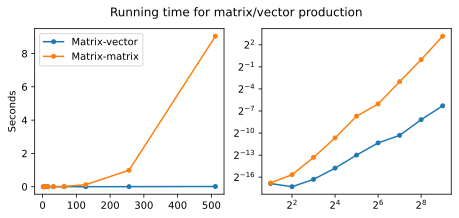

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 3))
vis_data = {
    'Matrix-vector': vec_times,
    'Matrix-matrix': mat_times
}


for data in vis_data.items():
    axes[0].plot(domain, data[1], '.-', ms=8, label=data[0])
    axes[0].set_ylabel('Seconds')
    # log-log scale 
    axes[1].loglog(domain, data[1], '.-', ms=8, base=2)

axes[0].legend(loc='upper left')
fig.suptitle('Running time for matrix/vector production');

In [7]:
# test numpy 
domain = 2**np.arange(1,10)

vec_times = []
mat_times = []
np_vec_times = []
np_mat_times = []

for n in domain:
    foov = random_vector(n)
    foom = random_matrix(n)
    start = time.time()
    matrix_vector_prod(foom, foov)
    vec_times.append(time.time()-start)
    # numpy 
    start = time.time()
    np.array(foom) @ np.array(foov) 
    np_vec_times.append(time.time()-start)
    start = time.time()
    matrix_matrix_prod(foom, foom)
    mat_times.append(time.time()-start)
    # numpy
    start = time.time()
    np.array(foom) @ np.array(foom)
    np_mat_times.append(time.time()-start)

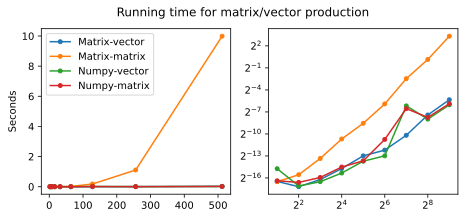

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 3))
vis_data = {
    'Matrix-vector': vec_times,
    'Matrix-matrix': mat_times,
    'Numpy-vector': np_vec_times,
    'Numpy-matrix': np_mat_times
}


for data in vis_data.items():
    axes[0].plot(domain, data[1], '.-', ms=8, label=data[0])
    axes[0].set_ylabel('Seconds')
    # log-log scale 
    axes[1].loglog(domain, data[1], '.-', ms=8, base=2)

axes[0].legend(loc='upper left')
fig.suptitle('Running time for matrix/vector production');

In [1]:
# test jax 
import os
import jax.numpy as jnp 
import jax.random as jrd 
from jax import grad, jit, vmap

In [12]:
# test numpy 
domain = 2**np.arange(1,10)

vec_times = []
mat_times = []
np_vec_times = []
np_mat_times = []
jax_vec_times = []
jax_mat_times = []

for n in domain:
    foov = random_vector(n)
    foom = random_matrix(n)
    start = time.time()
    matrix_vector_prod(foom, foov)
    vec_times.append(time.time()-start)
    start = time.time()
    matrix_matrix_prod(foom, foom)
    mat_times.append(time.time()-start)
    # numpy
    start = time.time()
    np.array(foom) @ np.array(foov) 
    np_vec_times.append(time.time()-start)
    start = time.time()
    np.array(foom) @ np.array(foom)
    np_mat_times.append(time.time()-start)
    # jax
    start = time.time()
    foom = jnp.array(foom)
    foov = jnp.array(foov)
    jnp.dot(foom, foov.T)
    jax_vec_times.append(time.time()- start)
    start = time.time()
    jnp.dot(foom, foom.T)
    jax_mat_times.append(time.time()- start)

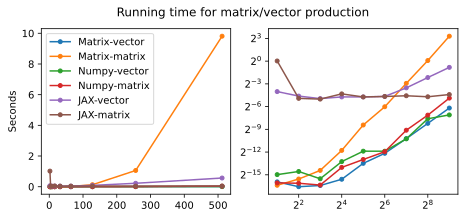

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 3))
vis_data = {
    'Matrix-vector': vec_times,
    'Matrix-matrix': mat_times,
    'Numpy-vector': np_vec_times,
    'Numpy-matrix': np_mat_times,
    'JAX-vector': jax_vec_times,
    'JAX-matrix': jax_mat_times
}


for data in vis_data.items():
    axes[0].plot(domain, data[1], '.-', ms=8, label=data[0])
    axes[0].set_ylabel('Seconds')
    # log-log scale 
    axes[1].loglog(domain, data[1], '.-', ms=8, base=2)

axes[0].legend(loc='upper left')
fig.suptitle('Running time for matrix/vector production');

JAX is slower because it has to transfer data to the GPU every time. 

In [ ]:
# with a larger matrix 
domain = 2**np.arange(1,11)

vec_times = []
mat_times = []
np_vec_times = []
np_mat_times = []
jax_vec_times = []
jax_mat_times = []

for n in domain:
    foov = random_vector(n)
    foom = random_matrix(n)
    start = time.time()
    matrix_vector_prod(foom, foov)
    vec_times.append(time.time()-start)
    start = time.time()
    matrix_matrix_prod(foom, foom)
    mat_times.append(time.time()-start)
    # numpy
    start = time.time()
    np.array(foom) @ np.array(foov) 
    np_vec_times.append(time.time()-start)
    start = time.time()
    np.array(foom) @ np.array(foom)
    np_mat_times.append(time.time()-start)
    # jax
    start = time.time()
    foom = jnp.array(foom)
    foov = jnp.array(foov)
    jnp.dot(foom, foov.T)
    jax_vec_times.append(time.time()- start)
    start = time.time()
    jnp.dot(foom, foom.T)
    jax_mat_times.append(time.time()- start)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(7.5, 3))
vis_data = {
    'Matrix-vector': vec_times,
    'Matrix-matrix': mat_times,
    'Numpy-vector': np_vec_times,
    'Numpy-matrix': np_mat_times,
    'JAX-vector': jax_vec_times,
    'JAX-matrix': jax_mat_times
}


for data in vis_data.items():
    axes[0].plot(domain, data[1], '.-', ms=8, label=data[0])
    axes[0].set_ylabel('Seconds')
    # log-log scale 
    axes[1].loglog(domain, data[1], '.-', ms=8, base=2)

axes[0].legend(loc='upper left')
fig.suptitle('Running time for matrix/vector production');

In [ ]:
# test random from jax 
key = jrd.PRNGKey(0)
x = jrd.normal(key, (10,))
print(x)

In [ ]:
size = 3000
x = jrd.normal(key, (size, size), dtype=jnp.float32)
%timeit jnp.dot(x, x.T).block_until_ready()  # runs on the GPU

## Using pytorch

In [2]:
import torch
print(torch.cuda.is_available())

True
